In [2]:
# for setting-up, need to set-up nodejs because jupyterlab get extensions from nmp packages
# conda install -c conda-forge nodejs
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
# (may need to restart your lab)

In [1]:
!jupyter labextension list
!jupyter nbextension list

JupyterLab v2.2.8
Known labextensions:


   app dir: C:\Users\nguye\anaconda3\envs\sem-37\share\jupyter\lab
        @jupyter-widgets/jupyterlab-manager v2.0.0 enabled  ok
        jupyter-webrtc v0.5.0 enabled  ok


Known nbextensions:
  config dir: C:\Users\nguye\.jupyter\nbconfig
    notebook section
      jupyter-js-widgets/extension enabled 
  config dir: C:\Users\nguye\anaconda3\envs\sem-37\etc\jupyter\nbconfig
    notebook section
      jupyter-webrtc/extension enabled 
      jupyter-js-widgets/extension enabled 


      - Validating: ok
      - Validating: ok
      - Validating: ok


In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual, Video, Image
import ipywidgets as widgets
from IPython.display import display

import skvideo
ffmpeg_path = 'C:/Users/nguye/ffmpeg-4.3.1-2020-10-01-full_build/bin'
skvideo.setFFmpegPath(ffmpeg_path)
import skvideo.io
import numpy as np
print("FFmpeg path: {}".format(skvideo.getFFmpegPath()))

FFmpeg path: C:/Users/nguye/ffmpeg-4.3.1-2020-10-01-full_build/bin


In [3]:
# Example opening mp4 video interactively

outputdata = np.random.random(size=(100, 480, 680, 3)) * 255
outputdata = outputdata.astype(np.uint8)

skvideo.io.vwrite("outputvideo.mp4", outputdata)
video_widget = Video.from_file('outputvideo.mp4')
video_widget

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x01\xb3\x9a\x7fmdat\x0…

load_and_draw - INFO - Input video: data/small_videos/6.2.5_C1_trim.mp4
load_and_draw - INFO - Input segmentation: database.200731.1.csv
load_and_draw - INFO - Output dir: output/
load_and_draw - DEBUG - Video writer: <class 'skvideo.io.ffmpeg.FFmpegWriter'>
C:\Users\nguye\anaconda3\envs\sem-37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
load_and_draw - INFO - Processing video...
load_and_draw - INFO - End of reading stream, ret is False!
load_and_draw - INFO - Done!


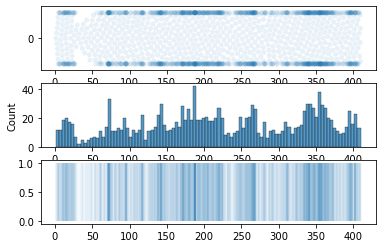

In [6]:
# Example running and opening output file
from load_and_draw import draw_segmentations, logger, logging
logger.setLevel(logging.DEBUG)
logger.info('Input video: data/small_videos/6.2.5_C1_trim.mp4')
logger.info('Input segmentation: database.200731.1.csv')
logger.info('Output dir: output/')

draw_segmentations(input_video_path='data/small_videos/6.2.5_C1_trim.mp4',
                   input_segmentation='database.200731.1.csv', output_dir='output',
                   output_video_name='output_video.mp4')

In [7]:
video_widget = Video.from_file('output/output_video.mp4')
display(video_widget)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x02t\x85\x86mdat\x00\x…

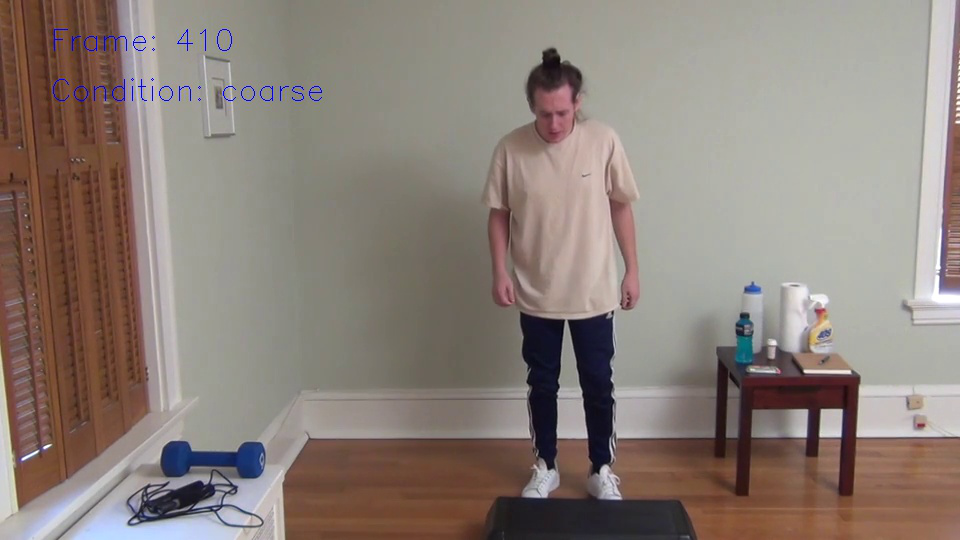

In [8]:
# Example displaying numpy array
frame = cv2.imread('output/413/410.jpg')
import IPython.display
import PIL.Image
IPython.display.display(PIL.Image.fromarray(frame[:, :, ::-1]))

In [9]:
# Example interactive widgets
import IPython.display
from ipywidgets import Image
@interact(integer=5, boolen=True, list_strings=['output/1042/1000.jpg', 'output/8376/8358.jpg'])
def f(integer, boolen, list_strings):
    IPython.display.display(Image.from_file(list_strings))
    return integer, boolen, list_strings

interactive(children=(IntSlider(value=5, description='integer', max=15, min=-5), Checkbox(value=True, descript…

C:\Users\nguye\anaconda3\envs\sem-37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


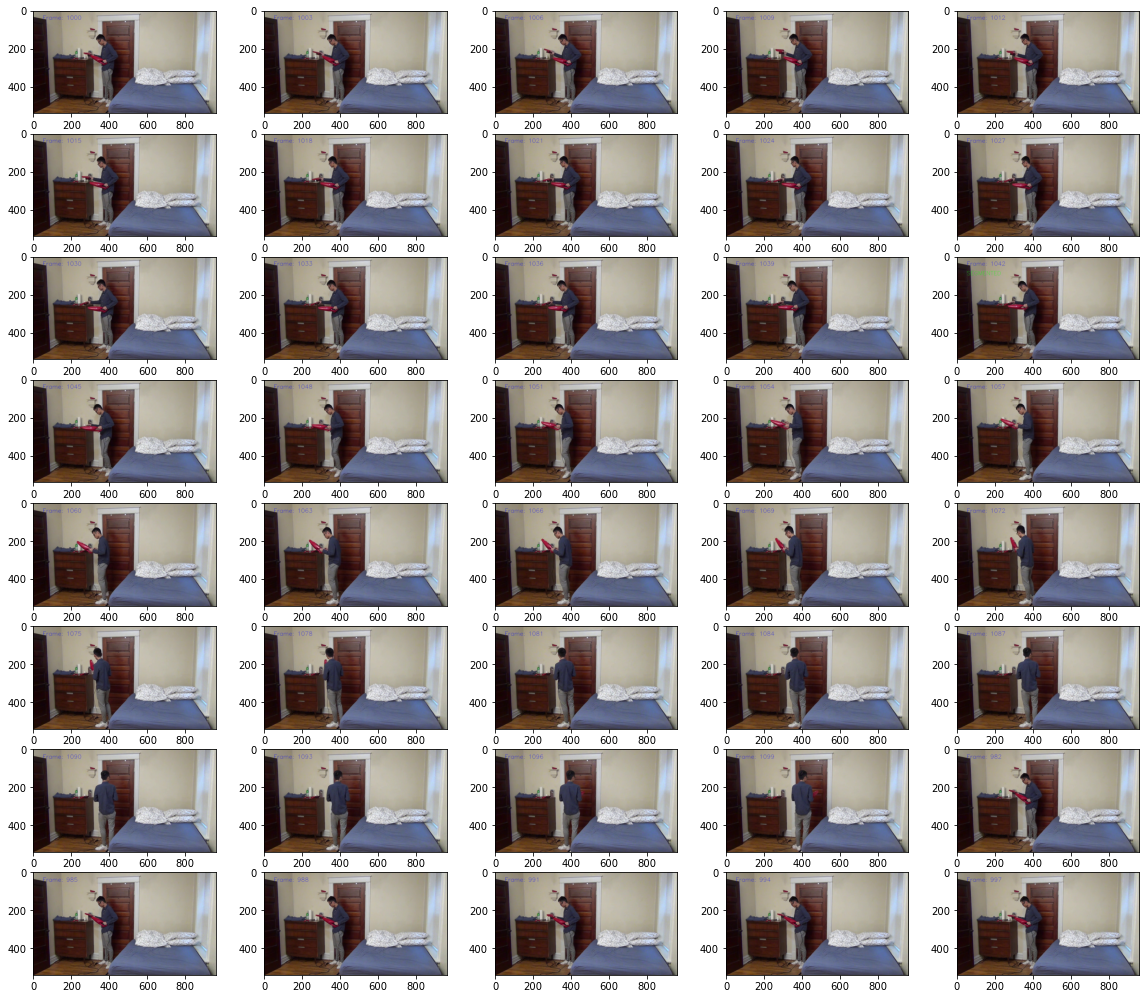

In [10]:
# Example viewing multiple images
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('output/1042/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)